In [ ]:
from datetime import UTC, datetime
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import xarray as xr

In [54]:
CE01_ISSP_PATH = Path("../data/CE01ISSP_nitrate_binned_baseline_subtracted_2014-04-17_2023-09-17.nc")
CE02_SHSP_PATH = Path("../data/CE02SHSP_nitrate_binned_baseline_subtracted_2015-03-18_2024-07-14.nc")

ce01 = (
    xr.open_dataset(CE01_ISSP_PATH)
    .resample(time="1D")
    .mean()
    .interpolate_na(dim="depth", max_gap=3)
    .interpolate_na(dim="time", max_gap=np.timedelta64(3, "D"))
)
ce02 = (
    xr.open_dataset(CE02_SHSP_PATH)
    .resample(time="1D")
    .mean()
    .interpolate_na(dim="depth", max_gap=3)
    .interpolate_na(dim="time", max_gap=np.timedelta64(3, "D"))
)

In [62]:
ce01_monthly_mean = ce01.groupby("time.month").mean("time")
ce02_monthly_mean = ce02.groupby("time.month").mean("time")
ce01_monthly_median = ce01.groupby("time.month").median("time")
ce02_monthly_median = ce02.groupby("time.month").median("time")
ce01_monthly_max = ce01.groupby("time.month").max("time")
ce02_monthly_max = ce02.groupby("time.month").max("time")
ce01_monthly_min = ce01.groupby("time.month").min("time")
ce02_monthly_min = ce02.groupby("time.month").min("time")

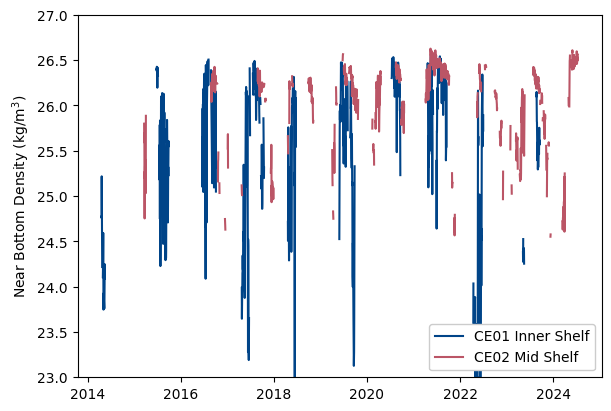

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), layout="constrained")

ax.plot(ce01["time"], ce01.sel(depth=15)["sigma_theta"], label="CE01 Inner Shelf", c="#004488")
ax.plot(ce02["time"], ce02.sel(depth=60)["sigma_theta"], label="CE02 Mid Shelf", c="#BB5566")
ax.set_ylim(23, 27)
ax.set_ylabel("Near Bottom Density ($\\mathsf{kg/m^3}$)")
ax.legend(loc="lower right", framealpha=1)
plt.savefig("../misc/or_profiler_bottom_density_timeseries.png", dpi=300)

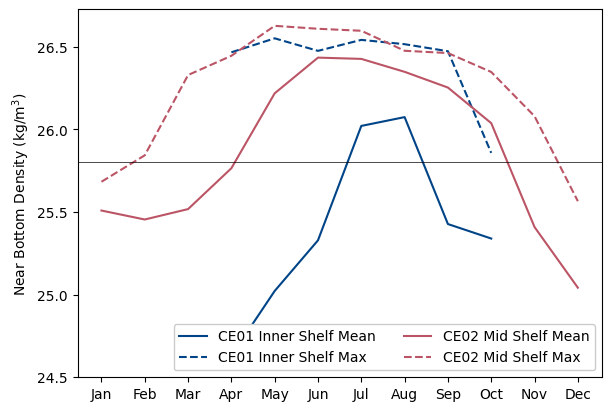

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), layout="constrained")


ax.set_ylabel("Near Bottom Density ($\\mathsf{kg/m^3}$)")
ax.plot(
    ce01_monthly_mean["month"],
    ce01_monthly_mean.sel(depth=15)["sigma_theta"],
    label="CE01 Inner Shelf Mean",
    c="#004488",
)
ax.plot(
    ce01_monthly_max["month"],
    ce01_monthly_max.sel(depth=15)["sigma_theta"],
    label="CE01 Inner Shelf Max",
    linestyle="--",
    c="#004488",
)
ax.plot(
    ce02_monthly_mean["month"],
    ce02_monthly_mean.sel(depth=60)["sigma_theta"],
    label="CE02 Mid Shelf Mean",
    c="#BB5566",
)
ax.plot(
    ce02_monthly_max["month"],
    ce02_monthly_max.sel(depth=60)["sigma_theta"],
    label="CE02 Mid Shelf Max",
    linestyle="--",
    c="#BB5566",
)
ax.axhline(25.8, c="k", ls="-", lw=0.5)
ax.legend(loc="lower right", framealpha=1, ncols=2)
ax.set_yticks(np.arange(24.5, 27, 0.5))
ax.set_xticks(np.arange(1, 13))
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: datetime(1900, int(x), 1, tzinfo=UTC).strftime("%b")))  # noqa: ARG005
plt.savefig("../misc/or_profiler_bottom_density_mean_monthly.png", dpi=300)